# Proyecto: DBSCAN con Reducción Dimensional (t-SNE y UMAP)

**Autores**: MERCHAN • OCHOA • PULIDO • SOSA

---

## Objetivos del Proyecto

1. Cargar y explorar dataset Iris
2. Aplicar preprocesamiento de datos
3. Implementar **t-SNE** → Visualizar → Aplicar **DBSCAN** → Evaluar
4. Implementar **UMAP** → Visualizar → Aplicar **DBSCAN** → Evaluar
5. Comparar resultados de ambos métodos

---

## Fase 1: Configuración Inicial y Exploración de Datos

En esta fase vamos a:
- Instalar y cargar librerías necesarias
- Cargar el dataset
- Realizar análisis exploratorio inicial
- Visualizar los datos originales

### 1.1 Instalación de Dependencias

In [ ]:
# Instalación de dependencias
#!pip install -q umap-learn scikit-learn pandas numpy matplotlib seaborn plotly tqdm

print("✓ Librerías listas para importar")

✓ Librerías listas para importar


### 1.2 Importación de Librerías

In [13]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")
print(f"  • NumPy versión: {np.__version__}")
print(f"  • Pandas versión: {pd.__version__}")

✓ Librerías importadas correctamente
  • NumPy versión: 2.0.2
  • Pandas versión: 2.2.2


### 1.3 Carga del Dataset

Vamos a cargar el dataset **Iris** como ejemplo inicial. Puedes cambiar a `load_digits()` o `load_wine()` si lo deseas.

In [14]:
# Cargar dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("=" * 60)
print("DATASET CARGADO: IRIS")
print("=" * 60)
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Clases: {len(target_names)} → {target_names}")
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print("=" * 60)

DATASET CARGADO: IRIS
Número de muestras: 150
Número de características: 4
Clases: 3 → ['setosa' 'versicolor' 'virginica']
Forma de X: (150, 4)
Forma de y: (150,)


### 1.4 Análisis Exploratorio de Datos (EDA)

In [15]:
# Crear DataFrame para análisis más fácil
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({i: name for i, name in enumerate(target_names)})

# Mostrar primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras 5 filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.1000

In [16]:
# Información del dataset
print("Información del Dataset:")
print(df.info())

print("\nValores faltantes:")
print(df.isnull().sum())

print("\nDistribución de clases:")
print(df['species'].value_counts())

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Valores faltantes:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Distribución de clases:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### 1.5 Visualización de Datos Originales

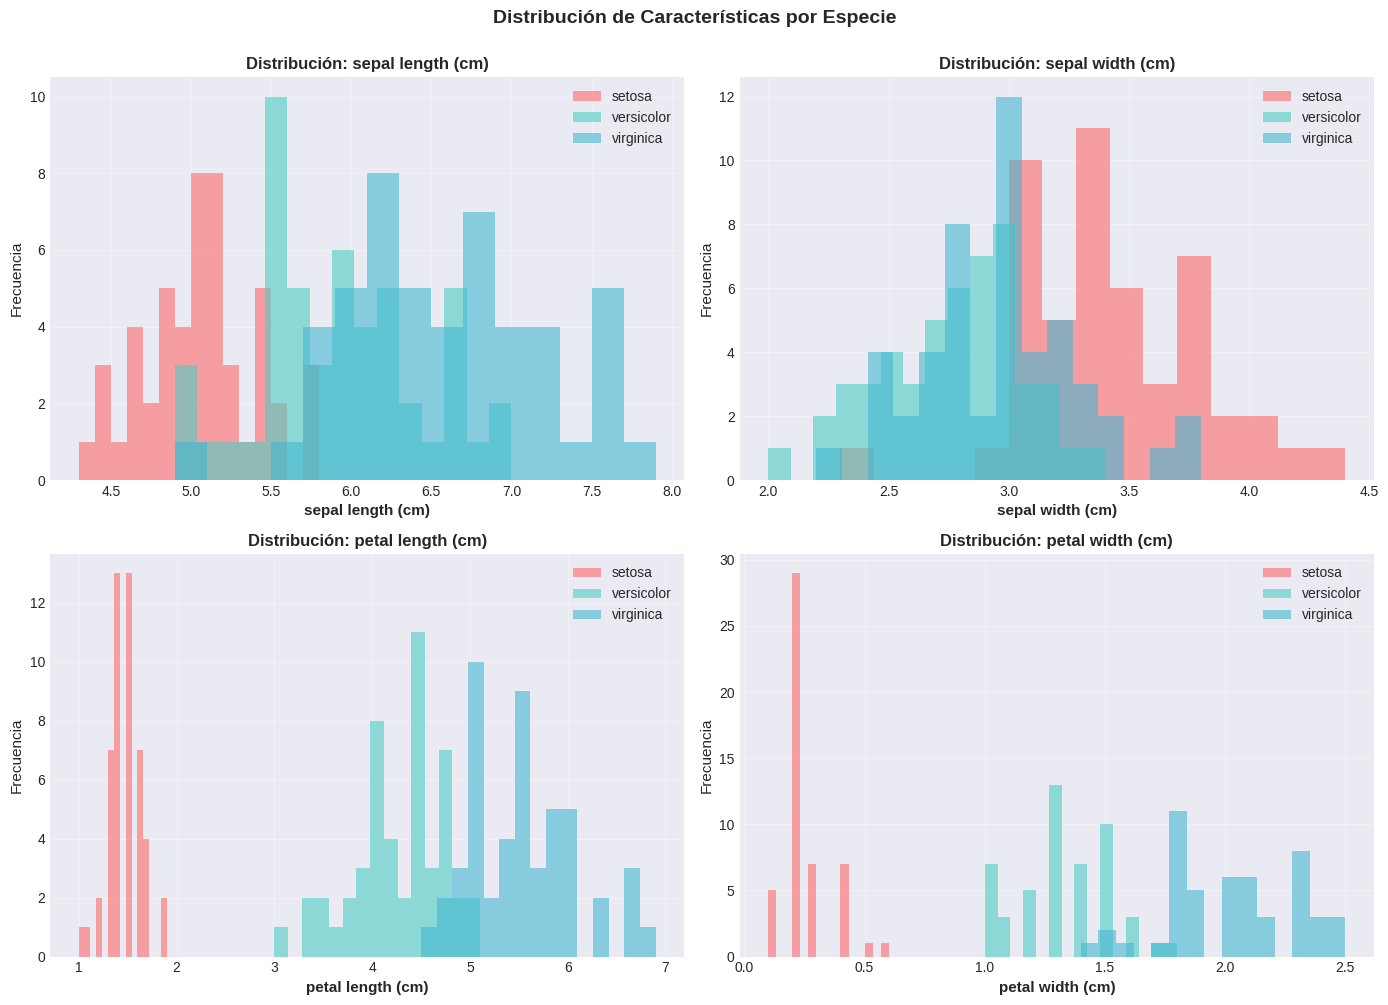

In [17]:
# Visualización 1: Distribución de características
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, feature in enumerate(feature_names):
    ax = axes[idx // 2, idx % 2]
    
    for i, species in enumerate(target_names):
        data = df[df['species'] == species][feature]
        ax.hist(data, alpha=0.6, label=species, bins=15, color=colors[i])
    
    ax.set_xlabel(feature, fontsize=11, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=11)
    ax.set_title(f'Distribución: {feature}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribución de Características por Especie', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

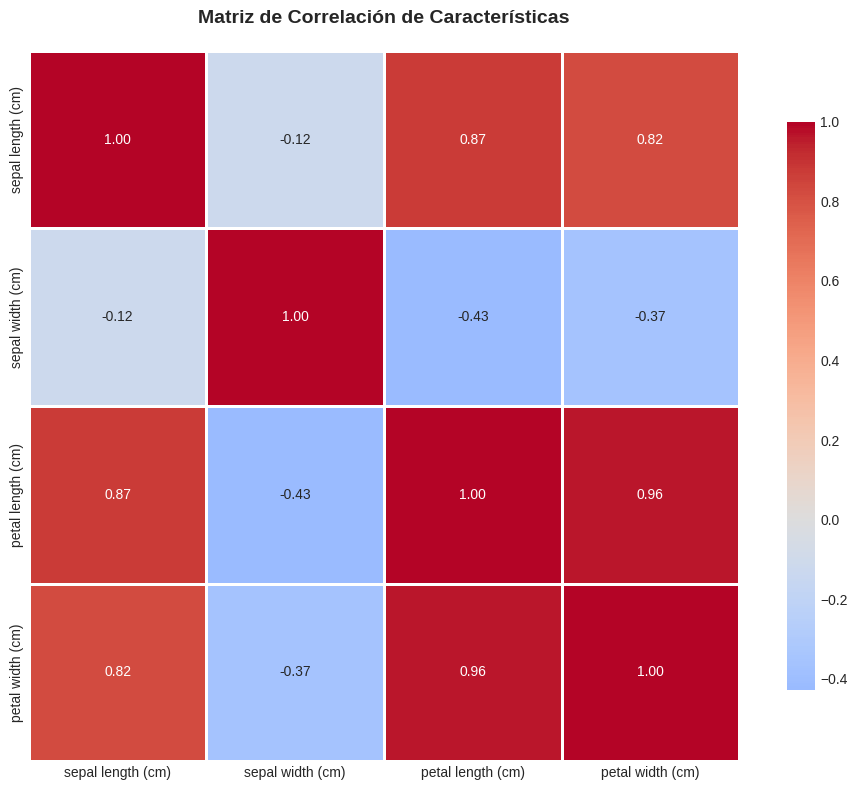


Correlaciones más fuertes:
petal length (cm)  petal width (cm)     0.962865
petal width (cm)   petal length (cm)    0.962865
sepal length (cm)  petal length (cm)    0.871754
dtype: float64


In [18]:
# Visualización 2: Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_names].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1, 
            cbar_kws={"shrink": 0.8}, fmt='.2f')

plt.title('Matriz de Correlación de Características', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelaciones más fuertes:")
# Obtener correlaciones (excluyendo diagonal)
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
print(corr_pairs.sort_values(ascending=False).head(3))

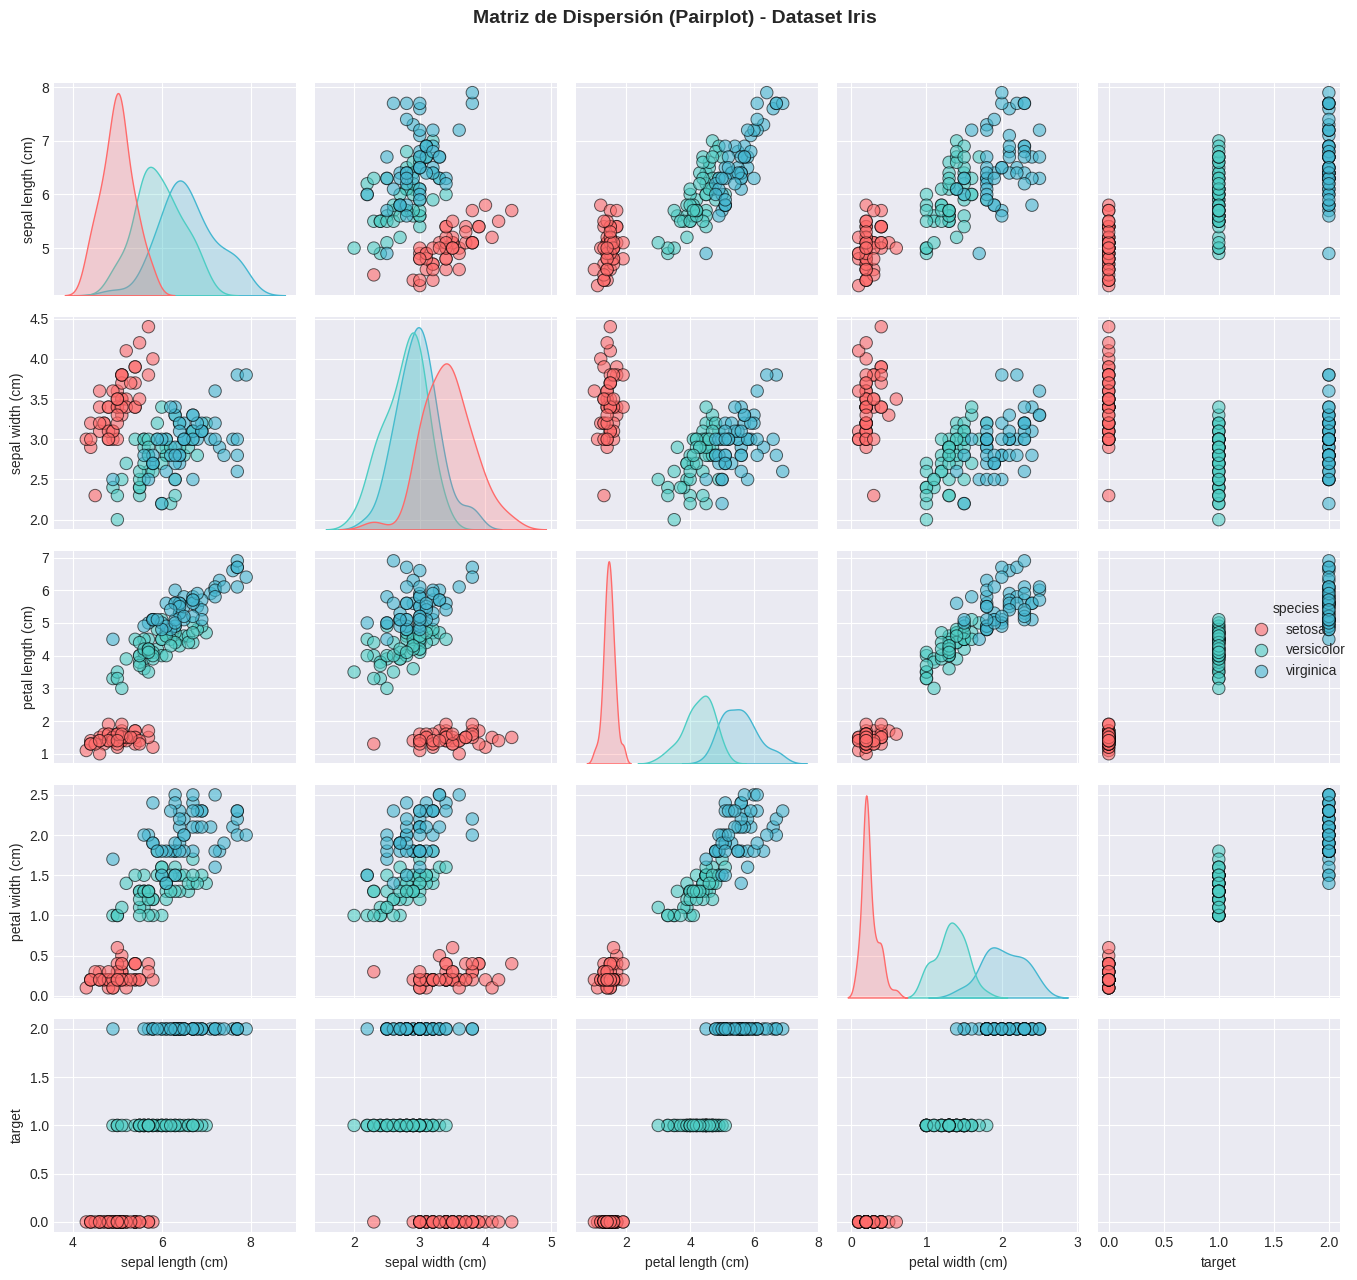

In [19]:
# Visualización 3: Pairplot (Scatter matrix)
# Seleccionamos solo las primeras 4 características para mejor visualización
sns.pairplot(df, hue='species', palette=colors, 
             diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'black'},
             height=2.5)

plt.suptitle('Matriz de Dispersión (Pairplot) - Dataset Iris', 
             y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

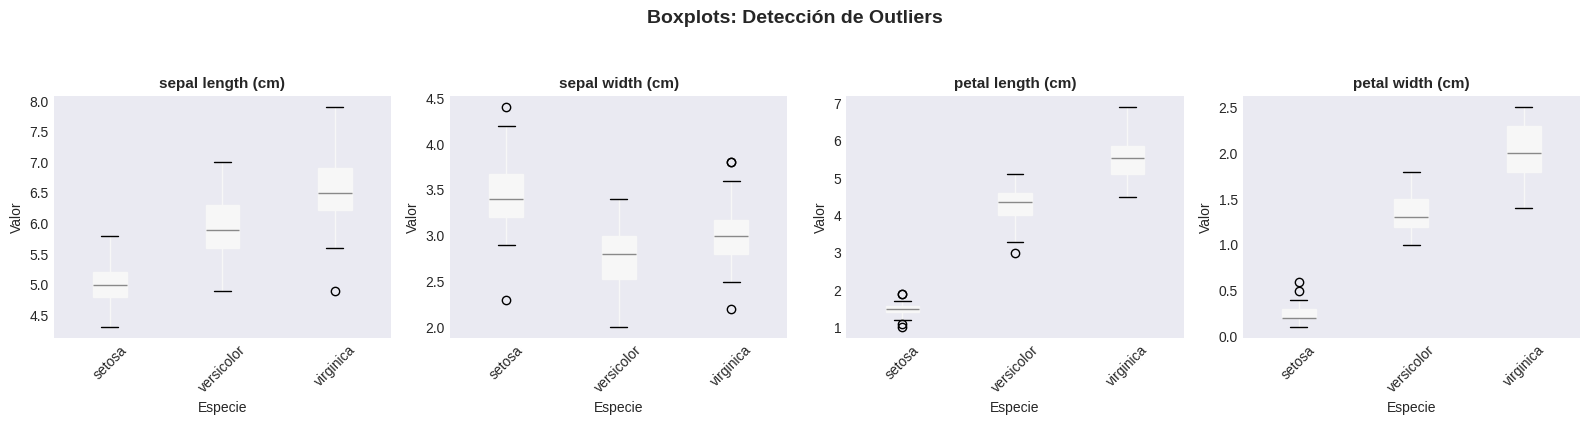

In [20]:
# Visualización 4: Boxplots para detectar outliers
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, feature in enumerate(feature_names):
    df.boxplot(column=feature, by='species', ax=axes[idx], 
               patch_artist=True, grid=False)
    axes[idx].set_title(feature, fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Especie', fontsize=10)
    axes[idx].set_ylabel('Valor', fontsize=10)
    plt.sca(axes[idx])
    plt.xticks(rotation=45)

plt.suptitle('Boxplots: Detección de Outliers', 
             fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()